## How count vectorizer and wordcloud works?

🔢 Count Matrix (Word Frequencies per Sentence):
   ai  awesome  cool  is  love
0   1        0     0   0     1
1   1        1     0   1     0
2   3        0     1   1     0

📊 Total Word Frequencies:
ai: 5
awesome: 1
cool: 1
is: 2
love: 1


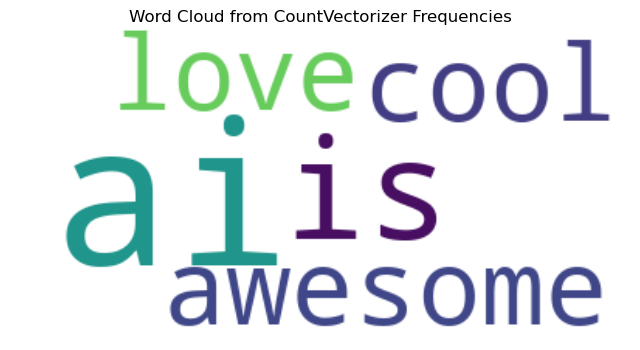

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Input text
texts = ["I love AI", "AI is awesome", "AI AI AI is cool"]

# 1. Count Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Convert to array and get feature names
word_array = X.toarray()
words = vectorizer.get_feature_names_out()

# 2. Create a DataFrame to display the count matrix
df_counts = pd.DataFrame(word_array, columns=words)
print("🔢 Count Matrix (Word Frequencies per Sentence):")
print(df_counts)

# 3. Get total word frequencies across all sentences
word_freq = dict(zip(words, word_array.sum(axis=0)))
print("\n📊 Total Word Frequencies:")
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

# 4. Generate WordCloud
wc = WordCloud(background_color="white", colormap='viridis')
wc.generate_from_frequencies(word_freq)

# 5. Display the WordCloud
plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from CountVectorizer Frequencies")
plt.show()


## Topic modeling using LDA

In [7]:
# Step 1: Import Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Step 2: Define Your Example Documents
documents = [
    "I love AI and data",
    "Data science is amazing",
    "AI is the future"
]
# Step 3: Convert Documents to Document-Term Matrix (DTM)
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)

# Show the DTM as a DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
print("🔠 Document-Term Matrix:")
print(dtm_df)

# Step 4: Apply LDA (Latent Dirichlet Allocation)
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(dtm)

# Step 5: Show Top Words in Each Topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🧠 Topic {topic_idx}:")
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print("Top words:", top_features)

display_topics(lda, vectorizer.get_feature_names_out(), 5)

# Step 6: See the Topic Distribution for Each Document
topic_distribution = lda.transform(dtm)
topic_df = pd.DataFrame(topic_distribution, columns=["Topic 0", "Topic 1"])
print("\n📊 Document-Topic Distribution:")
print(topic_df)


🔠 Document-Term Matrix:
   ai  amazing  and  data  future  is  love  science  the
0   1        0    1     1       0   0     1        0    0
1   0        1    0     1       0   1     0        1    0
2   1        0    0     0       1   1     0        0    1

🧠 Topic 0:
Top words: ['is', 'future', 'the', 'science', 'amazing']

🧠 Topic 1:
Top words: ['data', 'ai', 'love', 'and', 'is']

📊 Document-Topic Distribution:
    Topic 0   Topic 1
0  0.113399  0.886601
1  0.876629  0.123371
2  0.876636  0.123364


In [13]:
pip install --upgrade optree

     ---------------------------------------- 0.0/49.8 kB ? eta -:--:--
     --------------- ---------------------- 20.5/49.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 49.8/49.8 kB 507.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/306.6 kB ? eta -:--:--
   -------------------------------------- - 297.0/306.6 kB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 306.6/306.6 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: optree
    Found existing installation: optree 0.12.1
    Uninstalling optree-0.12.1:
      Successfully uninstalled optree-0.12.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [15]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# 1. Load the pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# 2. Input sentences
sentence_1 = "What is machine learning?"
sentence_2 = "Tell me about artificial intelligence."

# 3. Tokenize the sentences and convert to input IDs
inputs_1 = tokenizer(sentence_1, return_tensors='pt')
inputs_2 = tokenizer(sentence_2, return_tensors='pt')

# 4. Get the outputs from BERT (we use only the last hidden state)
with torch.no_grad():
    outputs_1 = model(**inputs_1)
    outputs_2 = model(**inputs_2)

# 5. Get sentence embeddings (we take the CLS token as sentence embedding)
embedding_1 = outputs_1.last_hidden_state[:, 0, :].numpy()
embedding_2 = outputs_2.last_hidden_state[:, 0, :].numpy()

# 6. Print the embeddings
print("Vector for sentence 1:", embedding_1[0][:10], "...")  # first 10 values only
print("Vector for sentence 2:", embedding_2[0][:10], "...")

# 7. Compute cosine similarity between the two sentences
similarity = cosine_similarity(embedding_1, embedding_2)[0][0]
print(f"\n🧠 Cosine Similarity between the sentences: {similarity:.4f}")


Vector for sentence 1: [-0.03797759  0.05030624 -0.02303568  0.06122556 -0.43190867 -0.25227314
  0.5778251   0.42743257 -0.02185435 -0.10157973] ...
Vector for sentence 2: [ 0.06222133 -0.1887599  -0.48370722  0.22833642 -0.36829945 -0.49966106
 -0.07465555  0.62344474  0.29746225 -0.3653606 ] ...

🧠 Cosine Similarity between the sentences: 0.9057


## code that represents with CLS and withput CLS?

In [17]:
from transformers import BertTokenizer, BertModel
import torch
import torch.nn.functional as F

# Load pre-trained BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Input sentence
sentence = "I love machine learning and artificial intelligence."

# Tokenize the input
inputs = tokenizer(sentence, return_tensors="pt")

# Get outputs from BERT
with torch.no_grad():
    outputs = model(**inputs)

# All token embeddings: [batch, tokens, hidden=768]
last_hidden_state = outputs.last_hidden_state

# ✅ 1. CLS vector (token 0)
cls_vector = last_hidden_state[:, 0, :]  # shape: [1, 768]

# ❌ 2. Average of all tokens
avg_vector = torch.mean(last_hidden_state, dim=1)  # shape: [1, 768]

# 🔍 3. Compare the vectors
cos_sim = F.cosine_similarity(cls_vector, avg_vector).item()

print("Cosine Similarity between CLS and AVERAGE vectors:", round(cos_sim, 4))
print("\nFirst 5 values of CLS vector:\n", cls_vector[0][:5])
print("\nFirst 5 values of AVG vector:\n", avg_vector[0][:5])


Cosine Similarity between CLS and AVERAGE vectors: 0.4091

First 5 values of CLS vector:
 tensor([ 0.0397,  0.0773, -0.3089, -0.3019, -0.5363])

First 5 values of AVG vector:
 tensor([ 0.3395,  0.3710, -0.1817,  0.1268,  0.3648])
